In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import pandas as pd
import time
from NEF_syn import *
from environments import *
from fit import *
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

In [20]:
def run_NEF_syn_weight(dataset, sid, lambd, n_neurons, alpha=1e-3, z=0):
    empirical = pd.read_pickle(f"data/{dataset}.pkl").query("sid==@sid")
    trials = empirical['trial'].unique() 
    columns = ['type', 'sid', 'trial', 'stage', 'lambda', 'n_neurons', 'error']
    dfs = []
    W = np.zeros((1, n_neurons))
    for trial in trials[:20]:
        print(f"training sid {sid}, trial {trial}")
        env = EnvironmentCount(dataset, sid=sid, trial=trial, lambd=lambd)
        net, sim, W = simulate_NEF_syn(W, env, alpha=alpha, n_neurons=n_neurons, z=z, seed_net=sid, train=True)
    np.savez(f"data/NEF_syn_{dataset}_{sid}_pretrained_weight.npz", W=W)
    for trial in trials:
        print(f"running sid {sid}, trial {trial}")
        env = EnvironmentCount(dataset, sid=sid, trial=trial, lambd=lambd)
        net, sim = simulate_NEF_syn(W, env, alpha=alpha, n_neurons=n_neurons, z=z, seed_net=sid, train=False)
        obs_times = env.obs_times
        for s, tidx in enumerate(obs_times):
            stage = env.stages[s]
            weight = np.mean(sim.data[net.probe_weight][tidx-100: tidx])
            target = np.mean(sim.data[net.probe_target][tidx-100: tidx])
            error = np.abs(target - weight)
            dfs.append(pd.DataFrame([['NEF_syn', sid, trial, stage, lambd, n_neurons, error]], columns=columns))
    data = pd.concat(dfs, ignore_index=True)
    return data

In [21]:
dataset = 'yoo'
sid = 13

lambd = 1.0
neurons = [100, 300, 500]

dfs = []
for n in neurons:
    data = run_NEF_syn_weight(dataset, sid, lambd, n)
    dfs.append(data)
neurons_data = pd.concat(dfs, ignore_index=True)

training sid 13, trial 1
training sid 13, trial 2
training sid 13, trial 3
training sid 13, trial 4
training sid 13, trial 5
training sid 13, trial 6
training sid 13, trial 7
training sid 13, trial 8
training sid 13, trial 9
training sid 13, trial 10
training sid 13, trial 11
training sid 13, trial 12
training sid 13, trial 13
training sid 13, trial 14
training sid 13, trial 15
training sid 13, trial 16
training sid 13, trial 17
training sid 13, trial 18
training sid 13, trial 19
training sid 13, trial 20
running sid 13, trial 1
running sid 13, trial 2
running sid 13, trial 3
running sid 13, trial 4
running sid 13, trial 5
running sid 13, trial 6
running sid 13, trial 7
running sid 13, trial 8
running sid 13, trial 9
running sid 13, trial 10
running sid 13, trial 11
running sid 13, trial 12
running sid 13, trial 13
running sid 13, trial 14
running sid 13, trial 15
running sid 13, trial 16
running sid 13, trial 17
running sid 13, trial 18
running sid 13, trial 19
running sid 13, trial 2

In [23]:
neurons_data

,type,sid,trial,stage,lambda,n_neurons,error
0,NEF_syn,13,1,1,1.0,100,0.193467
1,NEF_syn,13,1,2,1.0,100,0.060376
2,NEF_syn,13,1,3,1.0,100,0.196352
3,NEF_syn,13,1,4,1.0,100,0.229456
4,NEF_syn,13,1,5,1.0,100,0.208325
...,...,...,...,...,...,...,...
2695,NEF_syn,13,30,26,1.0,500,0.002149
2696,NEF_syn,13,30,27,1.0,500,0.002733
2697,NEF_syn,13,30,28,1.0,500,0.000595
2698,NEF_syn,13,30,29,1.0,500,0.004181


<Axes: xlabel='n_neurons', ylabel='error'>

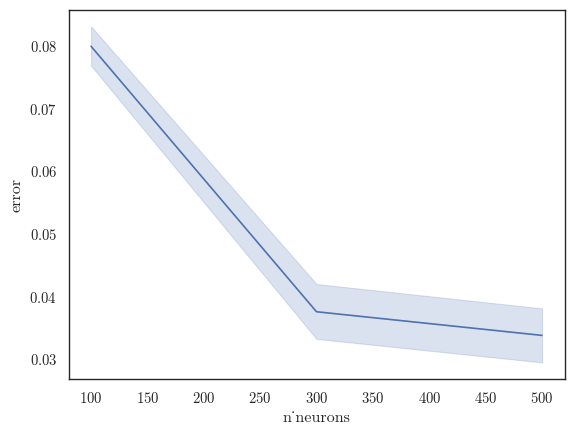

In [24]:
fig, ax = plt.subplots()
sns.lineplot(neurons_data, x='n_neurons', y='error', ax=ax)

In [25]:
dataset = 'yoo'
sid = 13

lambdas = [0, 0.5, 1.0]
n = 500

dfs = []
for lambd in lambdas:
    data = run_NEF_syn_weight(dataset, sid, lambd, n)
    dfs.append(data)
lambdas_data = pd.concat(dfs, ignore_index=True)

training sid 13, trial 1
training sid 13, trial 2
training sid 13, trial 3
training sid 13, trial 4
training sid 13, trial 5
training sid 13, trial 6
training sid 13, trial 7
training sid 13, trial 8
training sid 13, trial 9
training sid 13, trial 10
training sid 13, trial 11
training sid 13, trial 12
training sid 13, trial 13
training sid 13, trial 14
training sid 13, trial 15
training sid 13, trial 16
training sid 13, trial 17
training sid 13, trial 18
training sid 13, trial 19
training sid 13, trial 20
running sid 13, trial 1
running sid 13, trial 2
running sid 13, trial 3
running sid 13, trial 4
running sid 13, trial 5
running sid 13, trial 6
running sid 13, trial 7
running sid 13, trial 8
running sid 13, trial 9
running sid 13, trial 10
running sid 13, trial 11
running sid 13, trial 12
running sid 13, trial 13
running sid 13, trial 14
running sid 13, trial 15
running sid 13, trial 16
running sid 13, trial 17
running sid 13, trial 18
running sid 13, trial 19
running sid 13, trial 2